In [1]:
import sys
# sys.path
import ee
import pprint
from IPython.display import Image
# from image import Image as local_model
import openet.ssebop as local_model

gridded C version


In [2]:
# ! --NotebookApp.iopub_data_rate_limit 2000000.0
# ! NotebookApp.iopub_data_rate_limitFloat 2000000.0
# !conda config --NotebookApp.iopub_data_rate_limit 2000000.0
# !jupyter notebook --NotebookApp.iopub_data_rate_limit 2000000.0

In [3]:
try:
    ee.Initialize(use_cloud_api=True)
    print('worked')
except ee.EEException:
    ee.Authenticate()
    ee.Initialize(use_cloud_api=True)

worked


In [4]:

ndvi_palette = ['#EFE7E1', '#003300']
et_palette = [
    'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C', 
    '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']

image_size = 768

In [5]:

landsat_img = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_043035_20190715')
# landsat_img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_044033_20170801')

landsat_crs = landsat_img.select('B3').projection().getInfo()['crs']
landsat_region = landsat_img.geometry().bounds(1, 'EPSG:4326')
landsat_dt = ee.Date(landsat_img.get('system:time_start'))
# print(landsat_img.get('system:time_start').getInfo())

In [6]:
# Build the SSEBop object from the Landsat image
model_obj = local_model.Image.from_landsat_c1_toa(
    landsat_img,
    et_reference_source='IDAHO_EPSCOR/GRIDMET', 
    et_reference_band='etr', 
    et_reference_factor=0.85,
    et_reference_resample='nearest',
)

gridded-C branch!
Hello SSEBop! This is the gridded-c Branch of this model!


In [7]:
ndvi_image = model_obj.ndvi
print(ndvi_image.getInfo())

lazy NDVI for gridded C
{'type': 'Image', 'bands': [{'id': 'ndvi', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': -1, 'max': 1}, 'dimensions': [7601, 7731], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 569085, 0, -30, 4106115]}], 'id': 'LANDSAT/LC08/C01/T1_TOA/LC08_043035_20190715', 'properties': {'system:time_start': 1563216014558, 'image_id': 'LANDSAT/LC08/C01/T1_TOA/LC08_043035_20190715', 'system:index': 'LC08_043035_20190715'}}


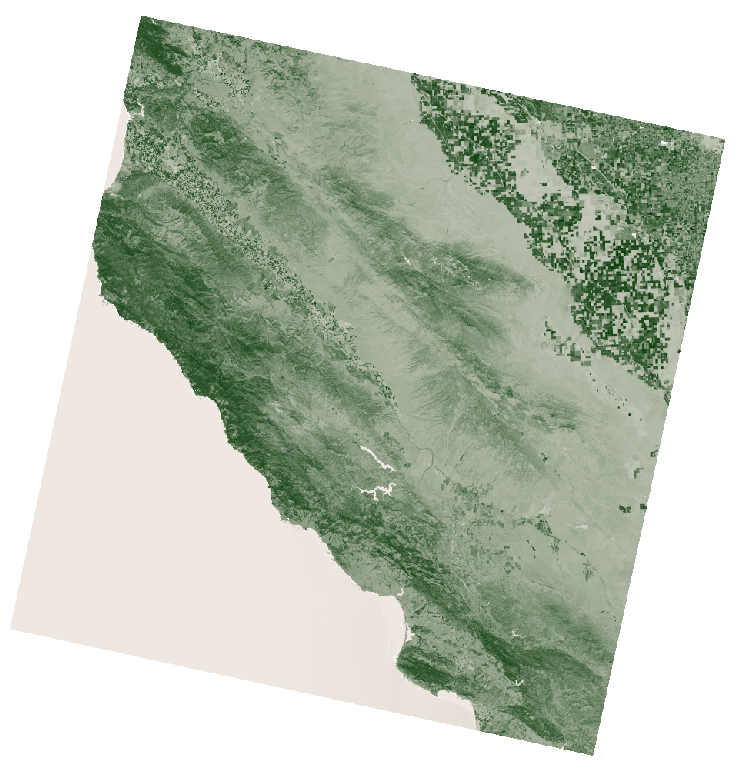

In [8]:
image_url = model_obj.ndvi\
    .getThumbURL({'min': -0.1, 'max': 0.9, 'palette': ndvi_palette, 
                  'region': landsat_region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

In [9]:
tcorr_image = model_obj.tcorr_image_gridded_focal

print(tcorr_image.getInfo())
# print(tcorr_image)

{'type': 'Image', 'bands': [{'id': 'tcorr', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'crs': 'EPSG:32610', 'crs_transform': [5000, 0, 569085, 0, -5000, 4106115]}]}


In [10]:
# plot tcorr image from the gridded output....

image_url = tcorr_image.getThumbURL({'min': 0.975, 'max': 1.05, 'palette': et_palette, 
                  'region': landsat_region, 'dimensions': 50}) #'dimensions': image_size

print(image_url)
Image(image_url, embed=True, format='png')

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/be59994155fba7c0dbf5762543f6664d-de3fa680bdacce139a2898d77d5f08a9:getPixels


FileNotFoundError: No such file or directory: 'None'

FileNotFoundError: No such file or directory: 'None'

<IPython.core.display.Image object>